In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import*
import seaborn as sns
sns.set(style="darkgrid")
import category_encoders as ce
import spacy
from spacy import displacy
from wordcloud import WordCloud
nlp = spacy.load("en_core_web_sm")

In [2]:
df = pd.read_csv(
        'train.csv',
        dtype={
            "id": np.int32,
            "keyword":str,
            "location":str,
            "text":str,
            "target":np.int32,
        }
)

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Analisis General

In [4]:
#Tamaño
df.shape

(7613, 5)

In [5]:
#Informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int32 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int32 
dtypes: int32(2), object(3)
memory usage: 238.0+ KB


In [6]:
#Descripcion General
df.describe( include = 'all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [7]:
#Elementos faltantes
faltantes= pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['Cantidad de nulls'])
total = faltantes['Cantidad de nulls'].sum()
faltantes['% del total de nulls']= round(100*faltantes['Cantidad de nulls']/total,2)
faltantes

,Cantidad de nulls,% del total de nulls
location,2533,97.65
keyword,61,2.35
target,0,0.00
text,0,0.00
id,0,0.00


# Columna id

In [10]:
df['id'].nunique()

7613

# Columna keyword

In [39]:
df['keyword'].nunique()

221

In [43]:
#Lleno elementos nulos
df_keyword_2 = df.copy()
df_keyword_2['keyword'] = df_keyword_2['keyword'].fillna(value='Vacio')
df_keyword_2['keyword'].value_counts().sort_values(ascending=False)

Vacio                    61
fatalities               45
deluge                   42
armageddon               42
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

In [44]:
#Binary Encoding
df_keyword_3 = df_keyword_2.copy()
df_keyword_3["keyword"] = df_keyword_3["keyword"].astype('category')
encoder = ce.BinaryEncoder(cols=['keyword'])
df_keyword_binary_encoding = encoder.fit_transform(df_keyword_3)
df_keyword_binary_encoding.head(1)

,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6,keyword_7,id,location,text,target
0,0,0,0,0,0,0,0,0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1


In [45]:
#Label encoding
df_keyword_4 = df.copy()
df_keyword_4['keyword'] = df_keyword_4['keyword'].fillna(value='Vacio')
df_keyword_4["keyword"] = df_keyword_4["keyword"].astype('category')
df_keyword_4['keyword'] = df_keyword_4['keyword'].cat.codes
df_keyword_4.head()

,id,keyword,location,text,target
0,1,0,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,0,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,0,NaN,All residents asked to 'shelter in place' are ...,1
3,6,0,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,0,NaN,Just got sent this photo from Ruby #Alaska as ...,1


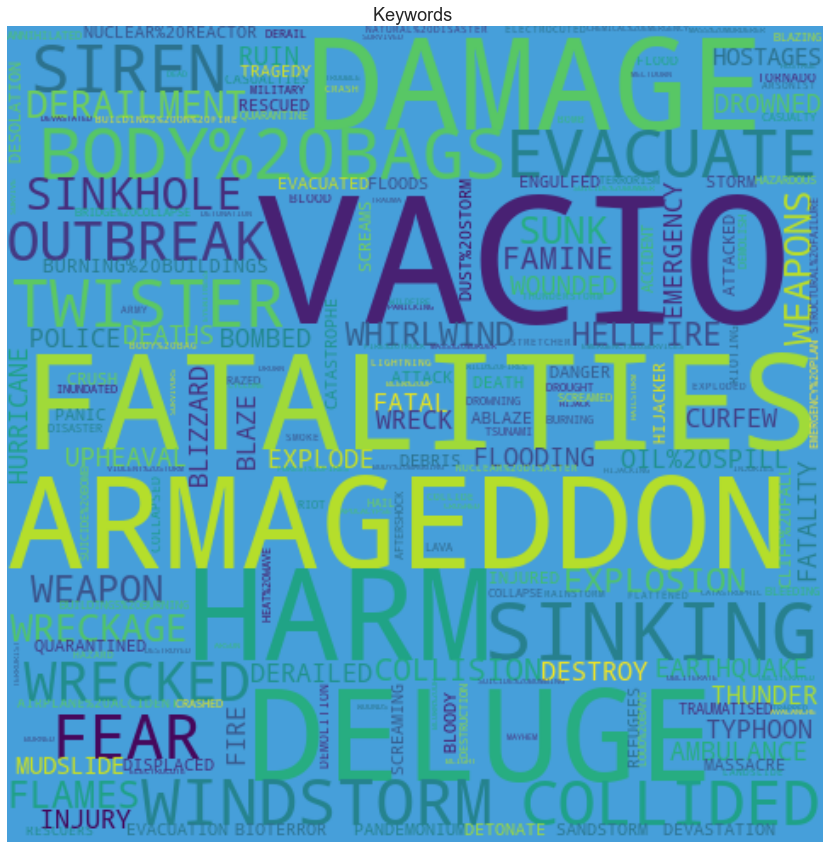

In [46]:
keywords = df_keyword_2['keyword'].astype('str').str.upper().value_counts()
keywords

# Función para realizar un gráfico de nube de palabras en funión de un diccionario de palabras y frecuencias

def wordcloud(frecuencias,titulo,tamanio=(15,15)):
    wordcloud = WordCloud(width=480, height=480, margin=0,background_color='#469FDA').generate_from_frequencies(frequencies=frecuencias)
    plt.figure(figsize=tamanio)
    plt.title(titulo,fontSize=18)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()
    
wordcloud(keywords,titulo='Keywords ')

# Columna Location 

In [50]:
df_location = df.copy()
df_location.shape

(7613, 5)

In [51]:
#Lleno elementos vacios
df_location['location'] = df_location['location'].fillna(value='Sin localizacion')
df_location['location'].value_counts().sort_values(ascending=False)

Sin localizacion    2533
USA                  104
New York              71
United States         50
London                45
                    ... 
The Pig Sty            1
518 åá NY              1
Cairo, Egypt           1
... -.- -.--           1
Sydney, NSW            1
Name: location, Length: 3342, dtype: int64

In [52]:
df_location['location'].nunique()

3342

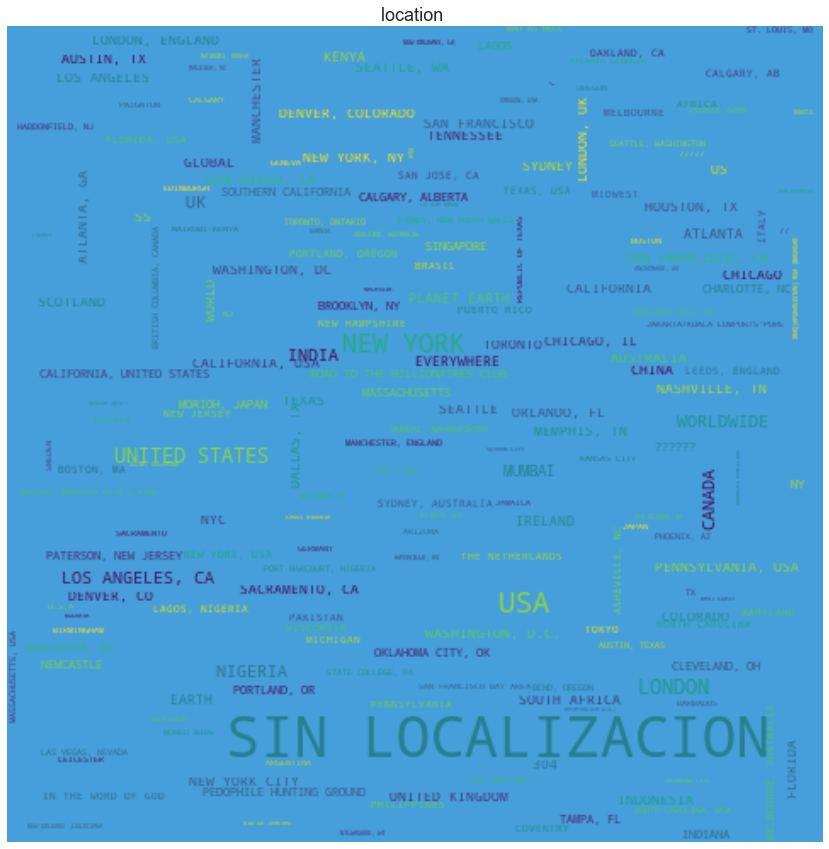

In [53]:
keywords = df_location['location'].astype('str').str.upper().value_counts()
keywords
wordcloud(keywords,titulo='location ')

# Columna texto

In [4]:
df_text = df.copy()
df_text.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
#Ejemplo de como separa cada palabra por tipo
doc = nlp(df_text['text'][1])
displacy.serve(doc, style="dep")

C:\Users\Giova\Anaconda3\lib\runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [6]:
#Parse del texto , donde cada token es una palabra

for i, row in df_text.iterrows():
  
    if(row["text"] and len(str(row["text"])) < 300):
        doc = nlp(str(row["text"]))
        
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []
        simbolos = []
        alfanumericos = []

        for token in doc:
            
            lemmas.append(token.lemma_)
            
            if not token.text.isalpha():
                alfanumericos.append(token.lemma_)
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
            if token.pos_ == "SYM":
                simbolos.append(token.lemma_)
         
        df_text.at[i, "alfanumericos"] = " ".join(alfanumericos)
        df_text.at[i, "sustantivos"] = " ".join(nouns)
        df_text.at[i, "adjetivos"] = " ".join(adjectives)
        df_text.at[i, "verbos"] = " ".join(verbs)
        df_text.at[i, "simbolos"] = " ".join(simbolos)
        df_text.at[i, "cant_verbos"] = len(verbs)
        df_text.at[i, "cant_abjetivos"] = len(adjectives)
        df_text.at[i, "cant_sustantivos"] = len(nouns)
        df_text.at[i, "cant_simbolos"] = len(simbolos)
        df_text.at[i, "longitud"] = len(row["text"])
        df_text.at[i, "cant_tokens"] = len(lemmas)
        
print('Completado')

Completado


In [7]:
df_text.head()

,id,keyword,location,text,target,alfanumericos,sustantivos,adjetivos,verbos,simbolos,cant_verbos,cant_abjetivos,cant_sustantivos,cant_simbolos,longitud,cant_tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,#,Deeds Reason earthquake ALLAH,#,forgive,,1.0,1.0,4.0,0.0,69.0,14.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,.,forest fire La Ronge Sask Canada,,,,0.0,0.0,6.0,0.0,38.0,8.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,' ' .,resident place officer evacuation shelter plac...,other,ask shelter notify expect,,4.0,1.0,7.0,0.0,133.0,25.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 #",people wildfire evacuation order California,,receive,#,1.0,0.0,5.0,1.0,65.0,9.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,# #,photo Ruby # Alaska smoke wildfire school,,get send pour,#,3.0,0.0,7.0,1.0,88.0,18.0


In [8]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7613 non-null   int32  
 1   keyword           7552 non-null   object 
 2   location          5080 non-null   object 
 3   text              7613 non-null   object 
 4   target            7613 non-null   int32  
 5   alfanumericos     7613 non-null   object 
 6   sustantivos       7613 non-null   object 
 7   adjetivos         7613 non-null   object 
 8   verbos            7613 non-null   object 
 9   simbolos          7613 non-null   object 
 10  cant_verbos       7613 non-null   float64
 11  cant_abjetivos    7613 non-null   float64
 12  cant_sustantivos  7613 non-null   float64
 13  cant_simbolos     7613 non-null   float64
 14  longitud          7613 non-null   float64
 15  cant_tokens       7613 non-null   float64
dtypes: float64(6), int32(2), object(8)
memory 